In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('nl_sp_orders_q1_full_last_version.dsv', sep=';', low_memory=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043975 entries, 0 to 1043974
Data columns (total 38 columns):
SCM_N_ORDER_POS_NR              1043975 non-null int64
SCM_N_ORDER_NR                  1043975 non-null int64
TDT_T_KEY_ORDER_DATE            1043975 non-null object
THR_C_KEY_ORDER_HOUR            1043975 non-null object
SIT_N_KEY_SITE                  1043975 non-null int64
CUS_N_KEY_CUSTOMER              1043975 non-null int64
SCM_SALES_BMF                   1043975 non-null object
SCM_SALES_CANCEL_BMF            1043975 non-null object
SCM_D_FINANCE_CM1               1043975 non-null object
SCM_D_FINANCE_CM2               1043975 non-null object
SCM_D_ORIG_FINANCE_ORDER_NET    1043975 non-null object
SCM_AP_ID                       1043975 non-null int64
SCM_AS_ID                       1043975 non-null int64
SCM_MASTER_AP_ID                1043975 non-null int64
SCM_IS_ZSP_ORDER                1043975 non-null int64
SCM_C_ORDER_STATUS              1043975 non-null object

In [5]:
data.head()

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,CZP_EXPIRY_DATE,CZP_ZTQ_ID,CZP_PERCENTAGE,CZP_PRICE,ORF_EXT_O_ID,ORF_EXT_K_ID,ORF_EXT_ROOT_K_ID,OP_AS_ID,OP_BONUSPOINTS,BP_TYP
0,433392124,101584477,01/01/18,19:10,7,5522699,"1,79",0,"0,8593","0,5813",...,24/11/20,52,3,"5,99",101584477,5522699,4487094,1708547,0,NaN
1,433392125,101584477,01/01/18,19:10,7,5522699,"8,97",0,"2,4332","1,5252",...,24/11/20,52,3,"5,99",101584477,5522699,4487094,1237178,0,NaN
2,433391793,101584373,01/01/18,19:08,7,12303445,"9,99",0,"2,4462","1,534",...,12/03/18,51,3,"2,99",101584373,12303445,12303445,2040733,0,NaN
3,433392122,101584477,01/01/18,19:10,7,5522699,"2,99",0,"1,7111","1,488",...,24/11/20,52,3,"5,99",101584477,5522699,4487094,2035783,0,NaN
4,433392126,101584477,01/01/18,19:10,7,5522699,"1,99",0,"0,6346","0,4148",...,24/11/20,52,3,"5,99",101584477,5522699,4487094,1429068,0,NaN


In [6]:
data['ORDER_DATETIME'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'] + ' ' + data['THR_C_KEY_ORDER_HOUR'] + ':00', 
                                        format="%d/%m/%y %H:%M:%S")

In [7]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [8]:
data['CZP_START_DATE'] = pd.to_datetime(data['CZP_START_DATE'], format="%d/%m/%y")
data['CZP_EXPIRY_DATE'] = pd.to_datetime(data['CZP_EXPIRY_DATE'], format="%d/%m/%y")

In [9]:
lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista

In [10]:
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0

In [11]:
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [12]:
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1

In [13]:
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2

In [14]:
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

In [15]:
lista4 = [float(str(i).replace(',','.')) for i in data['CZP_PRICE'].values]
data['CZP_PRICE'] = lista4

In [16]:
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100

In [17]:
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [18]:
#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

In [19]:
len(data), len(data['SCM_N_ORDER_NR'].unique())

(1043975, 202694)

In [20]:
#CHECK DUPLICATED ROWS

In [21]:
dupl_mask = [len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values]

In [22]:
len(dupl_mask), sum(dupl_mask)

(202694, 1189)

In [23]:
dup_orders = data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique()[dupl_mask].index.values

In [24]:
dup_orders[:10]

array([101575196, 101683201, 101875266, 102029594, 102302771, 102573169,
       102608058, 102948018, 103004966, 103121493], dtype=int64)

In [25]:
len(dup_orders)

1189

In [26]:
len(data[data['SCM_N_ORDER_NR'].isin(dup_orders)])

14970

In [27]:
cust_2_dup_orders = data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique()[\
data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique() > 1].index.values

In [28]:
cust_2_dup_orders

array([ 2503340,  4088739,  4172716,  5919341,  6058320,  8795711,
        8829076,  9152819,  9238289, 10330425, 12719936], dtype=int64)

In [29]:
data[(data['CUS_N_KEY_CUSTOMER'].isin(cust_2_dup_orders)) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]['SCM_N_ORDER_NR'].unique()

array([106203915, 106185681, 106254237, 106254669, 106336695, 106336620,
       106346003, 106350574, 106428604, 106428480, 106537960, 106537496,
       106606554, 106583234, 106653215, 106653143, 106930421, 106912918,
       107292125, 107293918, 107342636, 107342256], dtype=int64)

In [30]:
#Let's get incorrect duplicated indexes instead of order_id to exclude them and select the correct data subset
dup_indexes = []

for i in dup_orders:
    o_id = data[data['SCM_N_ORDER_NR'] == i]
    if o_id['CUS_N_KEY_CUSTOMER'].unique() not in cust_2_dup_orders:
        sp_dates = o_id['CZP_START_DATE'].value_counts().index.values
        min_date = o_id[o_id['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [31]:
len(dup_indexes)

1167

In [32]:
for c in cust_2_dup_orders:
    #print('Customer', c)
    cust_orders = data[(data['CUS_N_KEY_CUSTOMER'] == c) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]
    if cust_orders['SCM_IS_ZSP_ORDER'].sum() >= 1:
        #print('SP Sold')
        sp_datetime = cust_orders[cust_orders['SCM_MASTER_AP_ID'] == 42225]['ORDER_DATETIME'].unique()[0]
        if (o_id['ORDER_DATETIME'] < sp_datetime).sum() > 0:
            #print('One order before SP')
            before = cust_orders[cust_orders['ORDER_DATETIME'] < sp_datetime]
            sp_dates_b = before['CZP_START_DATE'].value_counts().index.values
            max_date_b = before[before['CZP_START_DATE'] > min(sp_dates)]
            max_dates_b = list(max_date_b.index.values)
            
            after = o_id[o_id['ORDER_DATETIME'] >= sp_datetime]
            sp_dates_a = after['CZP_START_DATE'].value_counts().index.values
            min_date_a = after[after['CZP_START_DATE'] < max(sp_dates)]
            min_dates_a = list(min_date_a.index.values)
            
            indexes_date_not_valid = max_dates_b + min_dates_a
            dup_indexes.append(indexes_date_not_valid)
        elif (o_id['ORDER_DATETIME'] < sp_datetime).sum() == 0:
            #print('One order after SP')
            sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
            min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
            dup_indexes.append(min_date.index.values)
        else:
            print('Something go wrong')
    elif cust_orders['SCM_IS_ZSP_ORDER'].sum() == 0:
        #print('No SP Sold')
        sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
        min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [33]:
len(dup_indexes)

1178

In [34]:
#Get a flatten list of indexes
dupl_ind = [i for lista in dup_indexes for i in lista]

In [35]:
len(dupl_ind)

7485

In [36]:
exclude_data = data.index.isin(dupl_ind)

In [37]:
data = data[~exclude_data]

In [38]:
len(data)

1036490

In [39]:
sum(len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values)

0

In [40]:
ztq = [51, 52, 53, 54, 55, 56, 151, 152]

## Gathering metrics

In [41]:
metrics_ztq = pd.DataFrame(columns=['ZTQ','active_customers', 'orders', 'sales_bmf', 'net_sales', 'CM1', 'CM2', 'CM1%', 'CM2%',
                                   'discount_amount', 'orders_%_neg_cm1', 'loss_in_CM1', 'orders_%_neg_cm2', 'loss_in_CM2'])
for tq in ztq:
    df_elems = []
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    #print('*** Tier ', tq, '***')
    df_elems.append(tq)
    #print('Active customers in selected period: ', data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    df_elems.append(data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    #print('Total orders placed: ', data_tier['SCM_N_ORDER_NR'].nunique())
    df_elems.append(data_tier['SCM_N_ORDER_NR'].nunique())
    #print('Total sales BMF: ', (data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    #print('Total net sales: ', data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum())
    df_elems.append(data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
    #print('Total CM1: ', data_tier['SCM_D_FINANCE_CM1'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum())
    #print('Total CM2: ', data_tier['SCM_D_FINANCE_CM2'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum())
    #print('Total CM1%: ', data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('Total CM2%: ', data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('-----')
    #print('Total discount given by ZP: ', (data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
    #                                        data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
                                            data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    #print('-----')
    cm1_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
    cm1_per_order[cm1_per_order <= 0].sum()
    orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
    #print('Total orders with negative CM1: ', len(orders_neg_cm1))
    #print('% Orders with negative CM1: ', len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM1: ', cm1_per_order[cm1_per_order <= 0].sum())
    df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
    cm2_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
    cm2_per_order[cm2_per_order <= 0].sum()
    orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
    orders_only_neg_cm2 = data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() <= 0]
    orders_only_neg_cm2.sum()
    
    #print('Total orders with negative CM2: ', len(orders_neg_cm2))
    #print('% Orders with negative CM2: ', len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM2: ', cm2_per_order[cm2_per_order <= 0].sum())
    df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
    
    #print('....................................................................................................................')
    #print('....................................................................................................................')
    new_row = pd.DataFrame.from_records([df_elems], columns=metrics_ztq.columns)
    metrics_ztq = metrics_ztq.append(new_row, ignore_index=True)

+ active_customers: different customer_id placing orders
+ orders: total orders amount in the tier
+ CM1: total CM1 in the tier
+ CM2: total CM2 in the tier
+ CM1%: CM1/net_sales
+ CM2%: CM2/net_sales
+ discount_amount: discount provided due to SP
+ orders_%_neg_cm1: % of orders having negative CM1 
+ loss_in_CM1: CM1 sum from orders having negative CM1
+ orders_%_neg_cm2: % of orders having negative CM2 
+ loss_in_CM2: CM2 sum from orders having negative CM2

In [42]:
metrics_ztq.round(2)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,discount_amount,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,51,26448,52789,3414669.06,2869383.69,743710.12,340276.73,25.92,11.86,-105868.18,0.77,-1045.64,13.36,-18545.64
1,52,28411,57651,4185821.68,3500003.38,877755.32,402427.24,25.08,11.50,-130536.02,1.19,-1729.20,15.07,-26094.72
2,53,11807,23480,1573219.75,1318235.49,342638.23,162052.13,25.99,12.29,-82924.48,0.93,-475.39,15.46,-9759.35
3,54,15574,32051,2544491.46,2126651.45,501534.80,223400.98,23.58,10.50,-135089.27,1.78,-1678.63,19.59,-20689.97
4,55,1382,2307,137387.57,113993.63,29979.72,13196.90,26.30,11.58,-4245.09,0.65,-57.22,15.08,-844.88
5,56,11080,19396,1334896.03,1108659.51,258083.93,104010.98,23.28,9.38,-69769.14,1.20,-567.28,21.65,-12136.52
6,151,8392,12062,664550.44,553766.05,117244.33,34503.33,21.17,6.23,-34640.74,2.06,-576.67,28.07,-9034.16
7,152,1864,2943,196279.59,164749.68,30864.34,8368.58,18.73,5.08,-16811.48,3.23,-270.32,34.73,-3215.03


In [43]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [44]:
metrics_ztq.round(2).style.apply(highlight_max)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,discount_amount,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,51,26448,52789,3.41467e+06,2.86938e+06,743710,340277,25.92,11.86,-105868,0.77,-1045.64,13.36,-18545.6
1,52,28411,57651,4.18582e+06,3.5e+06,877755,402427,25.08,11.5,-130536,1.19,-1729.2,15.07,-26094.7
2,53,11807,23480,1.57322e+06,1.31824e+06,342638,162052,25.99,12.29,-82924.5,0.93,-475.39,15.46,-9759.35
3,54,15574,32051,2.54449e+06,2.12665e+06,501535,223401,23.58,10.5,-135089,1.78,-1678.63,19.59,-20690
4,55,1382,2307,137388,113994,29979.7,13196.9,26.3,11.58,-4245.09,0.65,-57.22,15.08,-844.88
5,56,11080,19396,1.3349e+06,1.10866e+06,258084,104011,23.28,9.38,-69769.1,1.2,-567.28,21.65,-12136.5
6,151,8392,12062,664550,553766,117244,34503.3,21.17,6.23,-34640.7,2.06,-576.67,28.07,-9034.16
7,152,1864,2943,196280,164750,30864.3,8368.58,18.73,5.08,-16811.5,3.23,-270.32,34.73,-3215.03


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
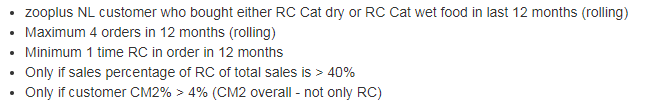

- High % of CM1 negative orders in RC Tiers
- Need to increase CM2 threshold for RC

## Behaviour per Tier

Histograms show frequencies from data values in a sample. We will see those for order number (order_ko_count_net, meaning the nth order the customer has placed) and other one based on basket value.

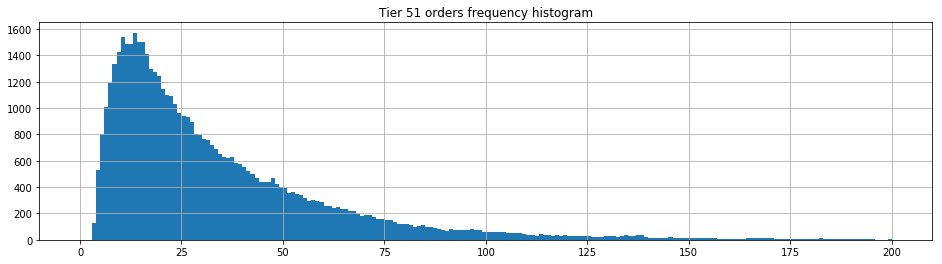

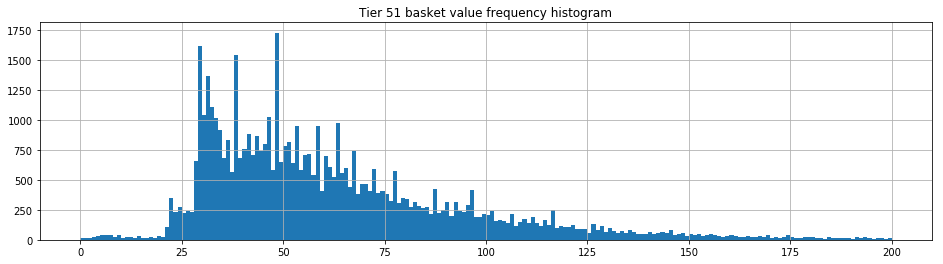

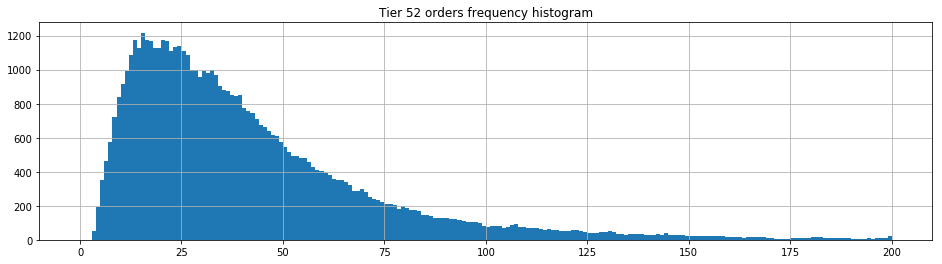

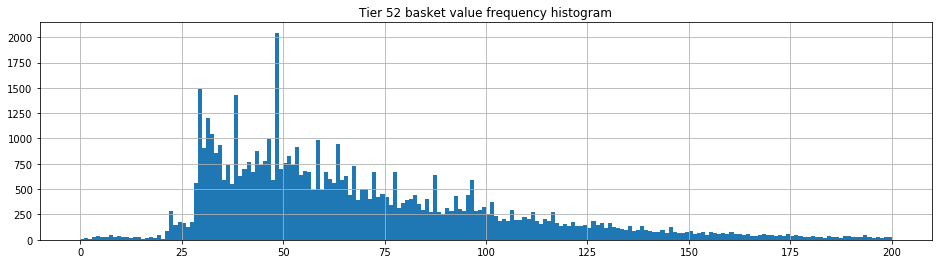

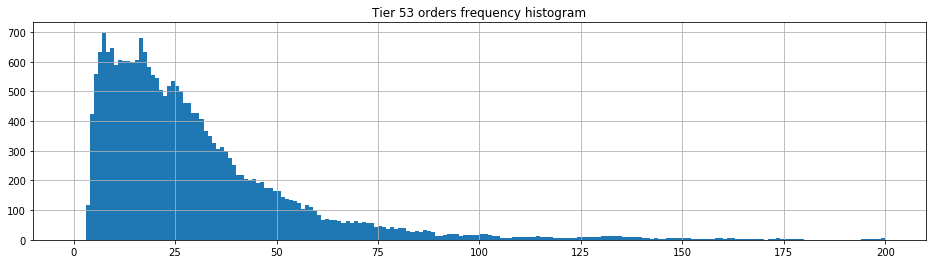

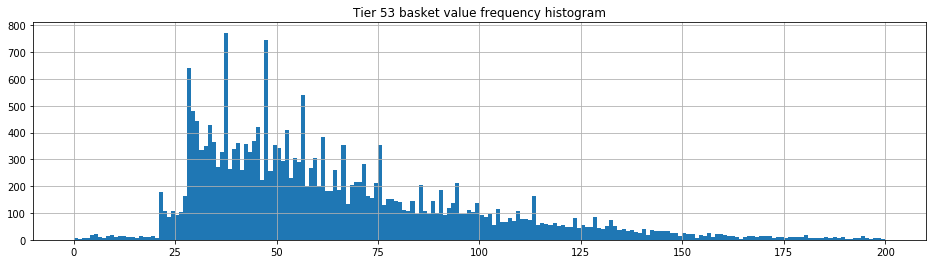

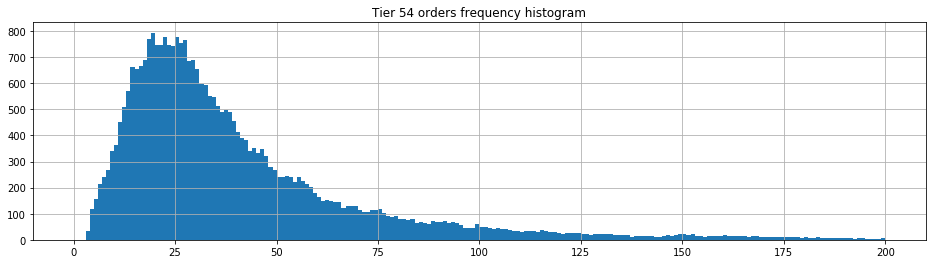

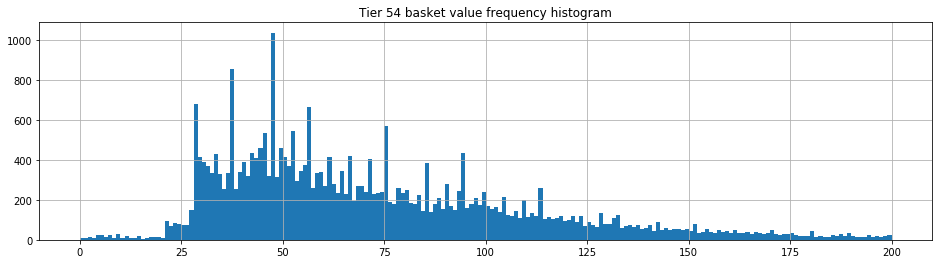

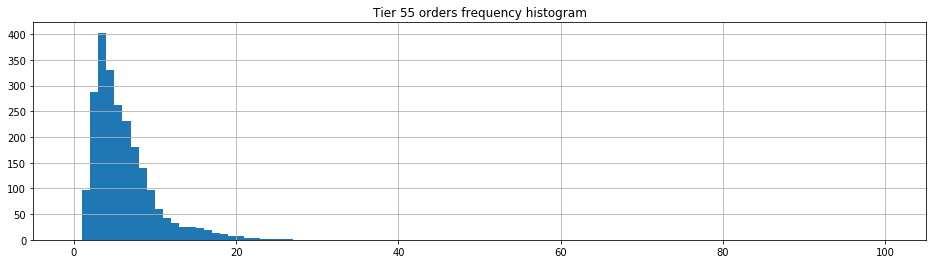

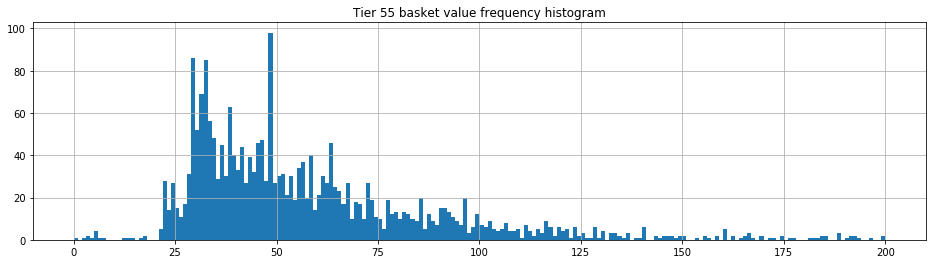

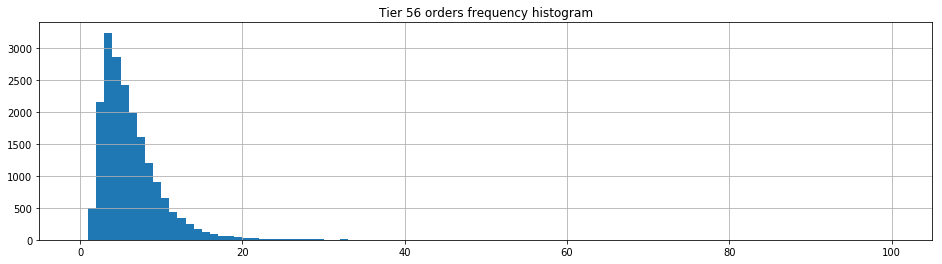

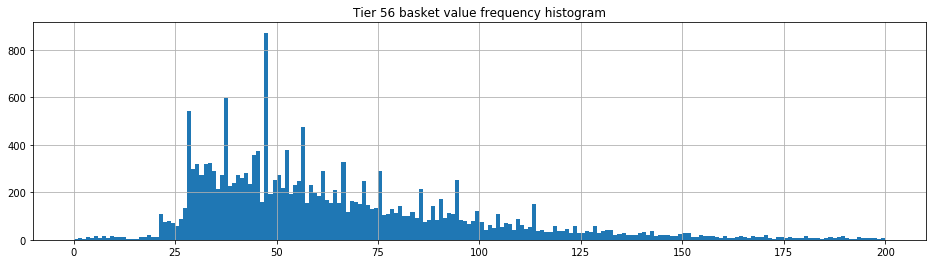

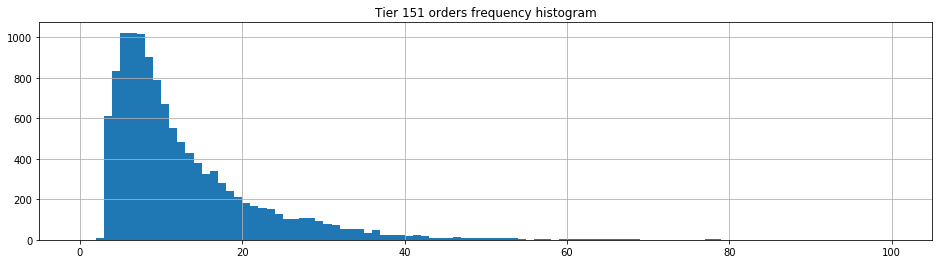

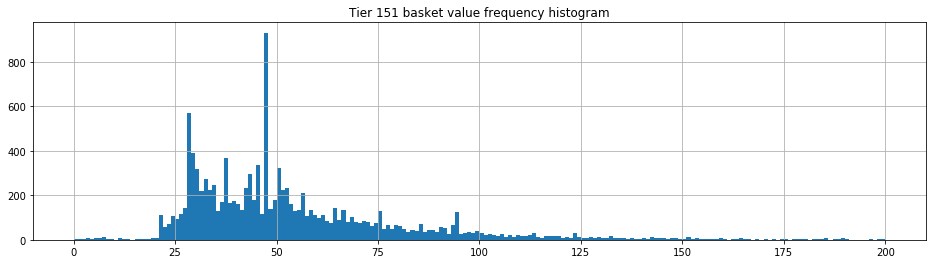

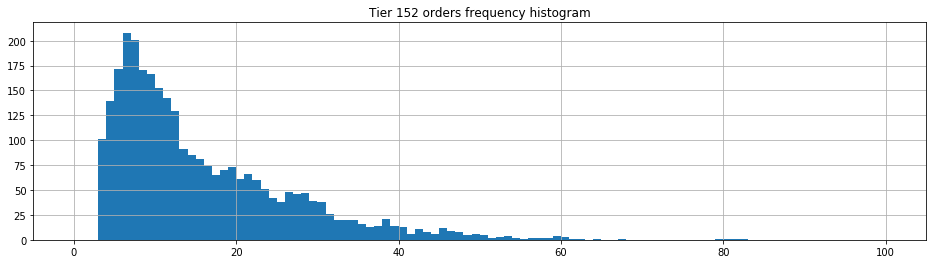

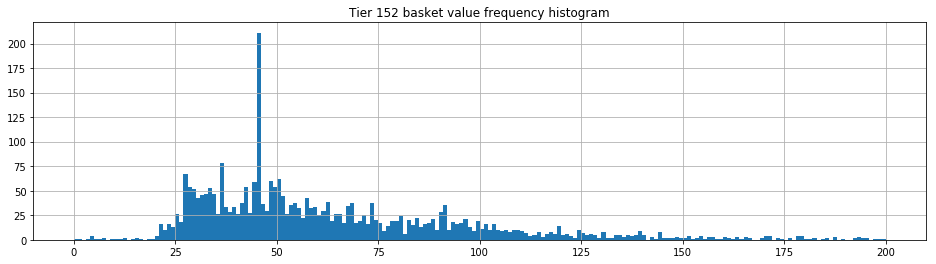

In [45]:
orders_summary = pd.DataFrame(columns = ['ZTQ', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
basket_value_summary = pd.DataFrame(columns = ['ZTQ', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    if tq in [51, 52, 53, 54]:
        plt.figure(figsize=(16,4))
        #plt.subplot(211)
        order_ko_count_net = data_tier.groupby('SCM_N_ORDER_NR', as_index=False)['OSP_KO_COUNT_NET'].mean()
        order_ko_count_net['OSP_KO_COUNT_NET'].hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' orders frequency histogram'
        plt.title(title)
        plt.show()
        ord_values = list(order_ko_count_net['OSP_KO_COUNT_NET'].describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  ord_values], columns=orders_summary.columns)
        orders_summary = orders_summary.append(new_row, ignore_index=True)
        
        plt.figure(figsize=(16,4))
        #plt.subplot(212)
        sales_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_BMF'].sum() -\
        data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_CANCEL_BMF'].sum()
        sales_per_order.hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' basket value frequency histogram'
        plt.title(title)
        plt.show()
        basket_values = list(sales_per_order.describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  basket_values], columns=basket_value_summary.columns)
        basket_value_summary = basket_value_summary.append(new_row, ignore_index=True)
        
    else:
        plt.figure(figsize=(16,4))
        #plt.subplot(211)
        order_ko_count_net = data_tier.groupby('SCM_N_ORDER_NR', as_index=False)['OSP_KO_COUNT_NET'].mean()
        order_ko_count_net['OSP_KO_COUNT_NET'].hist(bins=100, range=(0, 100))
        title = 'Tier ' + str(tq) + ' orders frequency histogram'
        plt.title(title)
        plt.show()
        ord_values = list(order_ko_count_net['OSP_KO_COUNT_NET'].describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  ord_values], columns=orders_summary.columns)
        orders_summary = orders_summary.append(new_row, ignore_index=True)
        
        plt.figure(figsize=(16,4))
        #plt.subplot(212)
        sales_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_BMF'].sum() -\
        data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_CANCEL_BMF'].sum()
        sales_per_order.hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' basket value frequency histogram'
        plt.title(title)
        plt.show()
        basket_values = list(sales_per_order.describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  basket_values], columns=basket_value_summary.columns)
        basket_value_summary = basket_value_summary.append(new_row, ignore_index=True)

And gather them into two tables...

In [46]:
#ORDERS HISTOGRAM SUMMARY
orders_summary.round(2).style.apply(highlight_max)

,ZTQ,count,mean,std,min,25%,50%,75%,max
0,51,52789,34.7,32.39,3,14,25,45,373
1,52,57651,42.75,37.01,3,20,33,54,554
2,53,23480,30.04,26.37,2,13,23,38,339
3,54,32051,44.03,48.18,2,20,31,51,1114
4,55,2307,5.61,3.77,1,3,5,7,26
5,56,19396,6.49,13.72,1,3,5,7,396
6,151,12062,12.19,9.1,2,6,9,16,112
7,152,2943,15.33,11.15,3,7,12,21,82


In [47]:
#BASKET VALUE HISTOGRAM SUMMARY
basket_value_summary.round(2).style.apply(highlight_max)

,ZTQ,count,mean,std,min,25%,50%,75%,max
0,51,52789,64.69,40.57,-11.02,38.79,54.3,78.04,2470.95
1,52,57651,72.61,45.61,-50.74,42.66,60.11,90.2,795.24
2,53,23480,67,41.58,-48.48,39.84,56.35,83.53,1626.05
3,54,32051,79.39,59.43,-17.19,45.55,64.59,97.81,2778.62
4,55,2307,59.55,35.03,-0,35.86,48.82,71.65,376.74
5,56,19396,68.82,49.42,-1.76,40.83,56.8,83.9,1086.29
6,151,12062,55.09,30.38,-2.71,34.29,47.49,64.95,363.77
7,152,2943,66.69,44.3,-4.52,40.44,53.33,82.8,560.72


- Tier 53 buying behaviour and basket value really close to Tier 51. Further analysis to get new criteria for renewals.
- Tier 151 having a low basket value compared to other tiers.

### Locate and quantify unprofitable  CM1 orders in absolute and relative terms regarding PG3 and PG4 levels per Tier

In [48]:
ord_cm1 = data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()

In [49]:
ord_neg_cm1 = ord_cm1[ord_cm1 <= 0].index.values

In [50]:
data['IS_CM1_NEG_ORDER'] = data['SCM_N_ORDER_NR'].isin(ord_neg_cm1) * 1

In [51]:
ord_coupon = data[data['SCM_MASTER_AP_ID'] == 6169]['SCM_N_ORDER_NR'].unique()

In [52]:
data['ORDER_HAS_COUPON'] = data['SCM_N_ORDER_NR'].isin(ord_coupon) * 1

In [53]:
data['BP_TYP'].unique()

array([nan, 'B '], dtype=object)

In [54]:
ord_bp = data[data['BP_TYP'] == 'B ']['SCM_N_ORDER_NR'].unique()

In [55]:
ord_bp

array([101567725, 101583659, 101554081, ..., 107774146, 107789435,
       107777421], dtype=int64)

In [56]:
data['ORDER_HAS_BP'] = data['SCM_N_ORDER_NR'].isin(ord_bp) * 1

In [57]:
data['ORDER_HAS_C+BP'] = data['ORDER_HAS_COUPON'] * data['ORDER_HAS_BP']

In [58]:
import cx_Oracle

In [59]:
data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique()

array([2.51000e+02, 8.57000e+02, 2.06800e+03, 2.52000e+02, 1.80000e+01,
       9.00000e+00, 3.01000e+02, 4.50000e+01, 1.54000e+03, 2.19200e+03,
       3.05000e+02, 2.30000e+01, 1.60000e+01, 2.90000e+01, 2.07624e+05,
       1.40000e+03, 3.30000e+01, 2.00000e+01, 4.20000e+01, 1.50000e+01,
       4.09000e+02, 4.00230e+04, 2.21000e+02, 6.20000e+01, 3.40000e+01,
       6.70000e+01, 3.60000e+01, 7.41000e+02, 2.07553e+05, 1.79470e+04,
       1.53317e+05, 2.15500e+03, 3.80000e+01, 6.80000e+01, 9.78800e+03,
       2.19000e+03, 3.70000e+01, 6.50000e+01, 2.47100e+03, 1.83134e+05,
       4.01000e+02, 7.58000e+02, 4.86000e+02, 2.55413e+05, 4.80000e+01,
       4.98280e+04, 5.10000e+01, 4.98210e+04, 4.84000e+02, 2.74000e+02,
       4.70000e+02, 1.10600e+03, 1.63500e+03, 4.70000e+01, 4.89630e+04,
       9.88500e+03, 3.11900e+03, 1.60300e+03, 5.00000e+01, 1.22398e+05,
       1.27770e+05, 0.00000e+00])

In [60]:
pg3_l = list(data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique())

In [61]:
pg3_list = repr(pg3_l).replace('[','(').replace(']',')') 

In [62]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg3_list

In [63]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg3 = pd.read_sql(query, con = conn)
conn.close()

In [64]:
pg3_dict = {key: value for (key, value) in zip(pg3['PG_ID'], pg3['PG_SHORTLINK'])}

In [65]:
pg3_dict[0] = 'null'

In [66]:
lista_pg3 = [pg3_dict[i] for i in data['OSP_3_LEAD_P_PG_ID'].fillna(0)]

In [67]:
len(lista_pg3), len(data['OSP_3_LEAD_P_PG_ID'])

(1036490, 1036490)

In [68]:
data['LEAD_PG3_NAME'] = lista_pg3

In [69]:
pg4_l = list(data['OSP_4_LEAD_P_PG_ID'].fillna(0).unique())

In [70]:
0 in pg4_l

True

In [71]:
pg4_list = repr(pg4_l).replace('[','(').replace(']',')') 

In [72]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg4_list

In [73]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg4 = pd.read_sql(query, con = conn)
conn.close()

In [74]:
pg4_dict = {key: value for (key, value) in zip(pg4['PG_ID'], pg4['PG_SHORTLINK'])}

In [75]:
pg4_dict[-1] = 'null'

In [76]:
lista_pg4 = [pg4_dict[i] for i in data['OSP_4_LEAD_P_PG_ID'].fillna(-1)]

In [77]:
len(lista_pg4), len(data['OSP_4_LEAD_P_PG_ID'])

(1036490, 1036490)

In [78]:
data['LEAD_PG4_NAME'] = lista_pg4

In [79]:
from IPython.display import display

+ OSP_3_LEAD_P_PG_ID
+ LEAD_PG3_NAME
+ OSP_4_LEAD_P_PG_ID
+ LEAD_PG4_NAME
+ IS_CM1_NEG_ORDER: flag 0-1, grouping all negative or positive orders regarding to CM1
+ SCM_N_ORDER_NR: orders amount for the corresponding flag
+ ORDERS_IN_PG: orders in product group (orders in flag 0, positives, plus orders in flag 1, negatives)
+ PERC_%_IN_PG: SCM_N_ORDER_NR / ORDERS_IN_PG
+ ORDER_HAS_COUPON: total orders using coupons
+ COUPONS_IN_PG: total coupons used in product group
+ COUPONS_%_IN_PG: ORDER_HAS_COUPON / COUPONS_IN_PG
+ ORDER_HAS_BP: total orders using coupons
+ BP_IN_PG: total orders having bonuspoints as payment in product group
+ BP_%_IN_PG: ORDER_HAS_BP / BP_IN_PG
+ SCM_D_FINANCE_CM1: CM1 sum from the orders in the flag
+ PERC_%_TOTAL_LOSS: CM1 sum divided by the total loss CM1 (sum CM1 for all negative CM1 orders)

In [80]:
orders_CM1 = data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
orders_CM1_neg = orders_CM1[orders_CM1 <= 0].index.values
print('Total orders: ', len(orders_CM1))
print('Total orders with negative CM1: ', len(orders_CM1_neg))
print('% of negative CM1 orders: ', len(orders_CM1_neg) / len(orders_CM1) * 100)
print('Total loss of CM1 (sum CM1 for all negative CM1 orders): ', orders_CM1[orders_CM1 <= 0].sum())
print('........................................................................................')
print('')
print('Unprofitable CM1 orders per Lead PG3 [Top 20]')
grp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                            as_index=False)['SCM_D_FINANCE_CM1'].sum()
grp_c = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_COUPON'].mean()
grp_bp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_BP'].mean()
grp_cbp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_C+BP'].mean()
df1 = grp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
df2 = grp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_N_ORDER_NR'].count()
dfc = grp_c.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].sum()
dfbp = grp_bp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].sum()
dfbpc = grp_cbp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].sum()
df3 = pd.merge(df1, df2, left_index=True, right_index=True, copy=False)
dfcbp = pd.merge(dfc, dfbp, left_index=True, right_index=True, copy=False)
df3cbp = pd.merge(df3, dfcbp, left_index=True, right_index=True, copy=False)
df_c_bp = pd.merge(df3cbp, dfbpc, left_index=True, right_index=True, copy=False)
df_c_bp = df_c_bp[['OSP_3_LEAD_P_PG_ID_x_x', 'LEAD_PG3_NAME_x_x', 'IS_CM1_NEG_ORDER_x_x', 'SCM_N_ORDER_NR',
                 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']]
df_c_bp.columns = ['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR', 
                    'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']
df_c_bp['ORDERS_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['SCM_N_ORDER_NR'].transform('sum')
df_c_bp['PERC_%_IN_PG'] = df_c_bp['SCM_N_ORDER_NR'] / df_c_bp['ORDERS_IN_PG'] * 100
df_c_bp['COUPONS_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_COUPON'].transform('sum')
#df3cbp['COUPONS_%_IN_PG'] = df3cbp['ORDER_HAS_COUPON'] / df3cbp['COUPONS_IN_PG'] * 100
df_c_bp['BP_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_BP'].transform('sum')
#df3cbp['BP_%_IN_PG'] = df3cbp['ORDER_HAS_BP'] / df3cbp['BP_IN_PG'] * 100
df_c_bp['C+BP_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_C+BP'].transform('sum')
df_c_bp['PERC_%_TOTAL_LOSS'] = df_c_bp['SCM_D_FINANCE_CM1'] / orders_CM1[orders_CM1 <= 0].sum() * 100
df_c_bp = df_c_bp[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR','ORDERS_IN_PG', 'PERC_%_IN_PG',
              'ORDER_HAS_COUPON', 'COUPONS_IN_PG', #'COUPONS_%_IN_PG', 
              'ORDER_HAS_BP', 'BP_IN_PG', #'BP_%_IN_PG',
              'ORDER_HAS_C+BP', 'C+BP_IN_PG', 'SCM_D_FINANCE_CM1', 'PERC_%_TOTAL_LOSS']]
display(df_c_bp.round(2).sort_values(by='SCM_D_FINANCE_CM1').head(20))
print('........................................................................................')
print('')
print('Unprofitable CM1 orders per Lead PG4 [Top 20]')
grp_2 = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
grp_2c = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].mean()
grp_2b = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].mean()
grp_2cb = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].mean()
df1_2 = grp_2.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                           'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
df2_2 = grp_2.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                           'IS_CM1_NEG_ORDER'], as_index=False)['SCM_N_ORDER_NR'].count()
dfc_2 = grp_2c.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].sum()
dfbp_2 = grp_2b.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].sum()
dfcbp_2 = grp_2cb.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].sum()
df4 = pd.merge(df1_2, df2_2, left_index=True, right_index=True, copy=False)
dfc_2 = pd.merge(dfc_2, dfbp_2, left_index=True, right_index=True, copy=False)
df4c = pd.merge(df4, dfc_2, left_index=True, right_index=True, copy=False)
df4c = pd.merge(df4c, dfcbp_2, left_index=True, right_index=True, copy=False)
df4c = df4c[['OSP_3_LEAD_P_PG_ID_x_x', 'LEAD_PG3_NAME_x_x', 'OSP_4_LEAD_P_PG_ID_x_x', 'LEAD_PG4_NAME_x_x', 'IS_CM1_NEG_ORDER_x_x',
                 'SCM_N_ORDER_NR', 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']]
df4c.columns = ['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 'IS_CM1_NEG_ORDER',
                    'SCM_N_ORDER_NR', 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP','SCM_D_FINANCE_CM1']
df4c['ORDERS_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['SCM_N_ORDER_NR'].transform('sum')
df4c['PERC_%_IN_PG'] = df4c['SCM_N_ORDER_NR'] / df4c['ORDERS_IN_PG'] * 100
df4c['COUPONS_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_COUPON'].transform('sum')
#df4c['COUPONS_%_IN_PG'] = df4c['ORDER_HAS_COUPON'] / df4c['COUPONS_IN_PG'] * 100
df4c['BP_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_BP'].transform('sum')
#df4c['BP_%_IN_PG'] = df4c['ORDER_HAS_BP'] / df4c['BP_IN_PG'] * 100
df4c['C+BP_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_C+BP'].transform('sum')
df4c['PERC_%_TOTAL_LOSS'] = df4c['SCM_D_FINANCE_CM1'] / orders_CM1[orders_CM1 <= 0].sum() * 100
df4c = df4c[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR',
                 'ORDERS_IN_PG', 'PERC_%_IN_PG', 'ORDER_HAS_COUPON', 'COUPONS_IN_PG', #'COUPONS_%_IN_PG', 
              'ORDER_HAS_BP', 'BP_IN_PG', #'BP_%_IN_PG', 
             'ORDER_HAS_C+BP', 'C+BP_IN_PG',
             'SCM_D_FINANCE_CM1', 'PERC_%_TOTAL_LOSS']]
display(df4c.round(2).sort_values(by='SCM_D_FINANCE_CM1').head(20))
print('........................................................................................')
print('........................................................................................')
print('')

Total orders:  202694
Total orders with negative CM1:  2471
% of negative CM1 orders:  1.219079005791982
Total loss of CM1 (sum CM1 for all negative CM1 orders):  -6402.343
........................................................................................

Unprofitable CM1 orders per Lead PG3 [Top 20]


,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,IS_CM1_NEG_ORDER,SCM_N_ORDER_NR,ORDERS_IN_PG,PERC_%_IN_PG,ORDER_HAS_COUPON,COUPONS_IN_PG,ORDER_HAS_BP,BP_IN_PG,ORDER_HAS_C+BP,C+BP_IN_PG,SCM_D_FINANCE_CM1,PERC_%_TOTAL_LOSS
42,252.0,katzenfutter_trockenfutter,1,1224,62210,1.97,986,11002,492,11256,325,2576,-3013.63,47.07
40,251.0,hundefutter_trockenfutter,1,588,60481,0.97,455,11080,262,11104,164,2652,-1348.11,21.06
67,2068.0,katzenfutter_dose,1,132,27525,0.48,58,4801,91,5150,31,1185,-414.77,6.48
6,18.0,hundesnacks,1,98,6613,1.48,30,1161,39,1412,13,313,-321.88,5.03
94,207624.0,ungezieferschutz,1,126,1376,9.16,19,190,41,229,7,41,-265.66,4.15
92,207553.0,ungezieferschutz,1,113,1336,8.46,16,178,40,280,5,52,-263.15,4.11
45,301.0,katzenstreu,1,30,12155,0.25,11,1257,24,1994,6,283,-133.08,2.08
58,857.0,hundefutter_nassfutter,1,21,5020,0.42,11,877,10,952,4,217,-74.29,1.16
1,9.0,hundebett,1,7,2346,0.30,2,279,1,339,1,58,-71.78,1.12
10,23.0,kratzbaum_katzenbaum,1,5,2558,0.20,4,441,1,351,1,75,-69.25,1.08


........................................................................................

Unprofitable CM1 orders per Lead PG4 [Top 20]


,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,IS_CM1_NEG_ORDER,SCM_N_ORDER_NR,ORDERS_IN_PG,PERC_%_IN_PG,ORDER_HAS_COUPON,COUPONS_IN_PG,ORDER_HAS_BP,BP_IN_PG,ORDER_HAS_C+BP,C+BP_IN_PG,SCM_D_FINANCE_CM1,PERC_%_TOTAL_LOSS
1267,252.0,katzenfutter_trockenfutter,683.0,royal_canin,1,794,20387,3.89,673,4064,310,3669,228,964,-1867.89,29.18
1476,252.0,katzenfutter_trockenfutter,261925.0,royal_canin_breed_cat,1,340,7611,4.47,282,1657,116,1251,79,331,-826.37,12.91
1062,251.0,hundefutter_trockenfutter,682.0,royal_canin_size,1,184,10704,1.72,158,2285,93,1860,69,496,-377.36,5.89
1049,251.0,hundefutter_trockenfutter,283.0,pro_plan,1,125,2948,4.24,116,616,41,587,33,147,-355.38,5.55
175,18.0,hundesnacks,394.0,zahnpflege_snacks,1,75,796,9.42,22,163,27,166,9,41,-216.33,3.38
1139,251.0,hundefutter_trockenfutter,17798.0,royal_canin_breed,1,84,6534,1.29,72,1408,33,1106,23,299,-208.91,3.26
2455,207624.0,ungezieferschutz,207690.0,spoton,1,68,743,9.15,12,103,28,132,5,27,-155.46,2.43
1044,251.0,hundefutter_trockenfutter,255.0,eukanuba,1,93,6297,1.48,76,1101,32,1242,21,275,-148.61,2.32
2406,207553.0,ungezieferschutz,209006.0,tabletten,1,48,205,23.41,4,26,15,46,2,11,-132.66,2.07
2402,207553.0,ungezieferschutz,207617.0,spoton,1,55,587,9.37,11,82,20,112,2,24,-105.84,1.65


........................................................................................
........................................................................................



Be careful with price and coupons (used simultaneously) in these cases:
- katzenfutter_trockenfutter (royal_canin)
- katzenfutter_trockenfutter (royal_canin_breed_cat)
- hundefutter_trockenfutter (royal_canin_size)
- hundefutter_trockenfutter (pro_plan)
- hundefutter_trockenfutter (royal_canin_breed)

## A level down through physical article level...

In [81]:
ap_list = list(data['SCM_AP_ID'].unique())

In [82]:
len(ap_list)

7973

In [83]:
ap_list.remove(0)

In [84]:
0 in ap_list

False

In [85]:
xlist = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
ylist = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]

arts = pd.DataFrame()
for x, y in zip(xlist, ylist):
    my_list_str = repr(ap_list[x:y]).replace('[','(').replace(']',')') 
    conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
    curs = conn.cursor()
    #query = """select ap_short_text, ap_id, ap_pp_id, pp_id, pp_name from ZOOMAN.ARTICLES_PHYSICAL zap
    #join ZOOMAN.PRODUCTS_PHYSICAL zpp on zap.ap_pp_id = zpp.pp_id
    #where to_char(ap_id) = :valores"""
    #art = pd.read_sql(query, con = conn, params={'valores': str(i)})
    query = """select ap_short_text, ap_id, ap_pp_id, pp_id, pp_name from ZOOMAN.ARTICLES_PHYSICAL zap
    join ZOOMAN.PRODUCTS_PHYSICAL zpp on zap.ap_pp_id = zpp.pp_id
    where ap_id in %s""" % my_list_str
    art = pd.read_sql(query, con = conn)
    arts = pd.concat((arts, art), axis=0, ignore_index=False)
    conn.close()    
    print(x, y)

0 1000
1000 2000
2000 3000
3000 4000
4000 5000
5000 6000
6000 7000
7000 8000


In [86]:
arts['AP_NAME'] = arts['PP_NAME'] + ' ' + arts['AP_SHORT_TEXT']

### Physical Article CM1

In [87]:
freq_list = []

for n, i in enumerate(ap_list):
    ap_id = data[data['SCM_AP_ID'] == i]
    total_orders = ap_id['SCM_N_ORDER_NR'].nunique()
    total_orders_bp = ap_id[ap_id['OP_BONUSPOINTS'] != 0]['SCM_N_ORDER_NR'].nunique()
    lis_o_ap_id_neg_cm1 = ap_id[ap_id['SCM_D_FINANCE_CM1'] <= 0]['SCM_N_ORDER_NR'].unique()
    lis_o_ap_id_pos_cm1 = ap_id[ap_id['SCM_D_FINANCE_CM1'] > 0]['SCM_N_ORDER_NR'].unique()
    cnt_o_id_neg_cm1_ap_id_neg_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() <= 0)
    cnt_o_id_neg_cm1_ap_id_pos_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_pos_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() <= 0)
    cnt_o_id_pos_cm1_ap_id_neg_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() > 0)
    cnt_o_id_pos_cm1_ap_id_pos_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_pos_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() > 0)
    prod_name = arts[arts['AP_ID'] == i]['AP_NAME'].iloc[0]
    freq_list.append([i
                    , prod_name
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['mean']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['min']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['max']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['25%']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['50%']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['75%']
                    , total_orders
                    , total_orders_bp
                    , cnt_o_id_neg_cm1_ap_id_neg_cm1
                    , cnt_o_id_neg_cm1_ap_id_pos_cm1
                    , cnt_o_id_pos_cm1_ap_id_neg_cm1
                    , cnt_o_id_pos_cm1_ap_id_pos_cm1
                     ])
    if n % 400 == 0:
        print(n)

0
400
800
1200
1600
2000
2400
2800
3200
3600
4000
4400
4800
5200
5600
6000
6400
6800
7200
7600


In [88]:
freq_df = pd.DataFrame(freq_list, columns=['SCM_AP_ID', 'AP_NAME', 'CM1_MEAN', 'CM1_MIN', 'CM1_MAX',
                                           'PERC_25', 'PERC_50', 'PERC_75',
                                           'TOT_ORDERS', 'TOT_ORDERS_BP', 'OCM1_NEG_APCM1_NEG', 'OCM1_NEG_APCM1_POS', 
                                           'OCM1_POS_APCM1_NEG', 'OCM1_POS_APCM1_POS'])

In [89]:
freq_df['PERC_APCM1_NEG'] = (freq_df['OCM1_NEG_APCM1_NEG'] + freq_df['OCM1_POS_APCM1_NEG']) / freq_df['TOT_ORDERS'] * 100

In [90]:
freq_df['PERC_OCM1_NEG'] = freq_df['OCM1_NEG_APCM1_NEG'] / freq_df['TOT_ORDERS'] * 100

+ SCM_AP_ID: physical article id
+ AP_NAME: physical article name
+ CM1_MEAN: average CM1
+ CM1_MIN
+ CM1_MAX
+ PERC_25: percentile 25
+ PERC_50: median 
+ PERC_75: percentile 75
+ TOT_ORDERS: orders in which physical article is present
+ TOT_ORDERS_BP: orders in which physical article has been bought using bonuspoints
+ OCM1_NEG_APCM1_NEG: orders with negative cm1 having physical article in the order negative cm1 too 
+ OCM1_NEG_APCM1_POS: orders with negative cm1 having physical article in the order positive cm1
+ OCM1_POS_APCM1_NEG: orders with positive cm1 having physical article in the order negative cm1
+ OCM1_POS_APCM1_POS: orders with positive cm1 having physical article in the order positive cm1 too
+ PERC_APCM1_NEG: (OCM1_NEG_APCM1_NEG + OCM1_POS_APCM1_NEG)/ TOT_ORDERS
+ PERC_OCM1_NEG: OCM1_NEG_APCM1_NEG / TOT_ORDERS

Let's get physical artical having more than 30 orders placed and, in more than 40% of the cases, AP_ID CM1 is negative...

In [91]:
freq_df[(freq_df['TOT_ORDERS'] > 100) & (freq_df['PERC_APCM1_NEG'] > 40)].round(2)\
.sort_values(by='PERC_APCM1_NEG', ascending=False).head(60)

,SCM_AP_ID,AP_NAME,CM1_MEAN,CM1_MIN,CM1_MAX,PERC_25,PERC_50,PERC_75,TOT_ORDERS,TOT_ORDERS_BP,OCM1_NEG_APCM1_NEG,OCM1_NEG_APCM1_POS,OCM1_POS_APCM1_NEG,OCM1_POS_APCM1_POS,PERC_APCM1_NEG,PERC_OCM1_NEG
7838,78707,toothbrush holder zooplus - Dog,-0.49,-0.49,-0.49,-0.49,-0.49,-0.49,141,141,4,0,137,0,100.00,2.84
4326,66632,Superfrauchen Armband Nordics - Superfrauchen ...,-0.11,-0.11,-0.11,-0.11,-0.11,-0.11,119,119,3,0,116,0,100.00,2.52
7832,78807,toothbrush holder zooplus - Cat,-0.49,-0.49,-0.49,-0.49,-0.49,-0.49,262,261,13,0,249,0,100.00,4.96
1672,66815,Superfrauchen Armband Nordics - Superfrauchen ...,-0.11,-0.11,-0.11,-0.11,-0.11,-0.11,197,195,6,0,191,0,100.00,3.05
7735,78918,Barkoo Kauknochen mit Ochsenziemerfüllung - 3 ...,-1.38,-1.45,-0.53,-1.45,-1.45,-1.45,2012,0,19,0,1993,0,100.00,0.94
279,9795,Spende für bedürftige Tiere -,0.00,0.00,0.00,0.00,0.00,0.00,2324,2314,36,0,2288,0,100.00,1.55
7608,77014,Wolf of Wilderness 100 g - Green Fields Adult,-0.27,-0.27,-0.27,-0.27,-0.27,-0.27,222,0,0,0,222,0,100.00,0.00
7464,79020,Lintbells Yumove Dog - Freebie 30 tablets,0.00,0.00,0.00,0.00,0.00,0.00,669,0,9,0,660,0,100.00,1.35
1299,23170,Extra Bonuspunkte - 100 Bonuspunkte extra,0.00,0.00,0.00,0.00,0.00,0.00,8601,0,59,0,8542,0,100.00,0.69
6610,77523,Cosma snackies XXL freebie - Chicken 12 g,-0.52,-0.52,-0.52,-0.52,-0.52,-0.52,174,0,0,0,174,0,100.00,0.00


In [92]:
freq_df[freq_df['TOT_ORDERS'] > 30].round(2)\
.sort_values(by='PERC_OCM1_NEG', ascending=False).head(30)

,SCM_AP_ID,AP_NAME,CM1_MEAN,CM1_MIN,CM1_MAX,PERC_25,PERC_50,PERC_75,TOT_ORDERS,TOT_ORDERS_BP,OCM1_NEG_APCM1_NEG,OCM1_NEG_APCM1_POS,OCM1_POS_APCM1_NEG,OCM1_POS_APCM1_POS,PERC_APCM1_NEG,PERC_OCM1_NEG
1363,25838,zooplus.de Geschenkgutschein Geschenkgutschein,13.16,0.00,41.32,0.00,16.53,24.79,66,0,33,2,0,31,50.00,50.00
2266,25726,Catit Water Fountain Trinkbrunnen 3 l inkl. Fu...,-2.73,-16.02,11.26,-15.88,8.97,9.66,45,20,15,0,7,23,48.89,33.33
640,17088,Leika Plüschbett - 50 cm,-5.52,-10.72,12.78,-10.70,-10.18,5.80,157,111,41,0,71,46,71.34,26.11
3716,9830,Schaf-Fell Hundekissen - L 45 x B 45 cm,-3.60,-11.27,15.46,-10.87,-10.67,7.30,78,48,16,0,32,30,61.54,20.51
3649,17096,Gino Hundekissen - 80 x 55 cm,-5.03,-8.64,17.04,-8.05,-8.01,-7.94,100,82,17,0,65,18,82.00,17.00
3562,18619,Pedigree Denta Stix Pedigree Denta Stix - Mult...,0.07,-1.28,17.23,-0.42,-0.40,-0.40,375,0,49,1,244,81,78.13,13.07
1632,23267,Catit Trinkbrunnen 2 L - 2 l Volumen,-0.81,-12.74,12.54,-12.73,5.87,6.26,190,69,24,2,45,119,36.32,12.63
2402,64590,Oase Kratzbaum - beige,2.62,-10.41,11.32,-9.50,9.47,11.15,114,44,14,0,30,70,38.60,12.28
1789,70649,Milbemax große Hunde (NL) - 2 x 2 Tabletten,-0.10,-10.74,7.08,-0.69,-0.69,1.41,570,0,64,6,311,189,65.79,11.23
7228,75904,isegrim Forest ADULT Rotwild mit Beeren - 3kg,6.08,-3.96,29.46,-0.64,2.81,9.82,61,0,6,0,10,45,26.23,9.84


## Let's try to identify resellers using true customer logic...

How can we label a root customer as reseller? Let's focus on: 
+ Having monthly net sales > 750€
+ Placing > 15 orders per month

In [93]:
dat = data.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'SCM_N_ORDER_NR'], as_index=False)['FINANCE_ORDER_NET'].mean()
dt = data.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'SCM_N_ORDER_NR'], as_index=False)['SCM_D_FINANCE_CM2'].sum()

In [94]:
d1 = dat.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['FINANCE_ORDER_NET'].sum()
d2 = dat.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['SCM_N_ORDER_NR'].count()
d12 = pd.merge(d1, d2, right_index=True, left_index=True, copy=False)
d3 = dt.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['SCM_D_FINANCE_CM2'].sum()
d4 = pd.merge(d3, d12, right_index=True, left_index=True, copy=False)
d4 = d4[['ORF_EXT_ROOT_K_ID_x', 'MONTH_NUMBER_x', 'FINANCE_ORDER_NET', 'SCM_N_ORDER_NR', 'SCM_D_FINANCE_CM2']]
d4.columns = ['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'FINANCE_ORDER_NET', 'SCM_N_ORDER_NR', 'SCM_D_FINANCE_CM2']

In [95]:
resellers = d4[(d4['FINANCE_ORDER_NET'] > 750) & (d4['SCM_N_ORDER_NR'] > 15)].sort_values(by='SCM_D_FINANCE_CM2')
resellers.round(2)

,ORF_EXT_ROOT_K_ID,MONTH_NUMBER,FINANCE_ORDER_NET,SCM_N_ORDER_NR,SCM_D_FINANCE_CM2
80601,8698204,1,1030.56,17,70.18
80603,8698204,3,1317.35,24,92.98
74348,8170654,3,1839.83,17,152.38
74347,8170654,2,1543.52,16,174.94
153015,17352069,3,2205.93,18,185.77
80024,8644240,3,2063.20,18,208.15
80022,8644240,1,1465.54,17,232.92


In [96]:
# 4 root_customer_id
list(resellers['ORF_EXT_ROOT_K_ID'].unique())

[8698204, 8170654, 17352069, 8644240]

In [97]:
# 4 customer_id tagged as resellers...
data[data['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]['CUS_N_KEY_CUSTOMER'].unique()

array([11677333,  8841204, 17352069,  8644240], dtype=int64)

In [98]:
metrics_resellers_ztq = pd.DataFrame(columns=['ZTQ','active_customers', 'orders', 'sales_bmf', 'net_sales', 'CM1', 
                                              'CM2', 'CM1%', 'CM2%','orders_%_neg_cm1', 'loss_in_CM1', 'orders_%_neg_cm2', 
                                              'loss_in_CM2'])

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    d_res = data_tier[data_tier['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]
    
    df_elems = []
    df_elems.append(tq)
    
    if d_res['CUS_N_KEY_CUSTOMER'].nunique() != 0:
        df_elems.append(d_res['CUS_N_KEY_CUSTOMER'].nunique())
        df_elems.append(d_res['SCM_N_ORDER_NR'].nunique())
        df_elems.append((d_res['SCM_SALES_BMF'] - d_res['SCM_SALES_CANCEL_BMF']).sum())
        df_elems.append(d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM1'].sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM2'].sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM1'].sum() / d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
        df_elems.append(d_res['SCM_D_FINANCE_CM2'].sum() / d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    
        cm1_per_order = d_res.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
        cm1_per_order[cm1_per_order <= 0].sum()
        orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
        df_elems.append(len(orders_neg_cm1)/d_res['SCM_N_ORDER_NR'].nunique()*100)
        df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
        cm2_per_order = d_res.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
        cm2_per_order[cm2_per_order <= 0].sum()
        orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
        orders_only_neg_cm2 = d_res[~d_res['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
        [d_res[~d_res['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() <= 0]
        orders_only_neg_cm2.sum()
    
        df_elems.append(len(orders_neg_cm2)/d_res['SCM_N_ORDER_NR'].nunique()*100)
        df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
    else:
        df_elems = df_elems + [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        
    new_row = pd.DataFrame.from_records([df_elems], columns=metrics_resellers_ztq.columns)
    metrics_resellers_ztq = metrics_resellers_ztq.append(new_row, ignore_index=True)

In [99]:
metrics_resellers_ztq['orders%'] = metrics_resellers_ztq['orders'] / metrics_ztq['orders'] * 100
metrics_resellers_ztq['sales_bmf%'] = metrics_resellers_ztq['sales_bmf'] / metrics_ztq['sales_bmf'] * 100
metrics_resellers_ztq['net_sales%'] = metrics_resellers_ztq['net_sales'] / metrics_ztq['net_sales'] * 100

+ active_customers: different customer_id placing orders
+ orders: total orders amount in the tier
+ CM1: total CM1 in the tier
+ CM2: total CM2 in the tier
+ CM1%: CM1/net_sales
+ CM2%: CM2/net_sales
+ discount_amount: discount provided due to SP
+ orders_%_neg_cm1: % of orders having negative CM1 
+ loss_in_CM1: CM1 sum from orders having negative CM1
+ orders_%_neg_cm2: % of orders having negative CM2 
+ loss_in_CM2: CM2 sum from orders having negative CM2

And see the impact in the whole tier...

In [100]:
#Resellers activity per tier
metrics_resellers_ztq.round(2)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2,orders%,sales_bmf%,net_sales%
0,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,52,1,49,6150.9,5095.67,1089.65,593.82,21.3839,11.6534,2.04082,-6.6773,10.2041,-28.9528,0.0849942,0.146946,0.145591
2,53,2,48,6056.67,5030.09,873.521,485.898,17.3659,9.65982,2.08333,-9.1948,14.5833,-27.1547,0.204429,0.384986,0.381578
3,54,1,49,3666.54,3037.02,522.834,248.23,17.2153,8.17346,6.12245,-3.8337,24.4898,-36.4248,0.152881,0.144097,0.142808
4,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,56,1,31,7280.21,6016.7,1080.46,581.015,17.9577,9.6567,0,0,6.45161,-14.3433,0.159827,0.545377,0.542701
6,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
metrics_ztq['active_resellers'] = metrics_resellers_ztq['active_customers']
metrics_ztq['perc_orders_resellers'] = metrics_resellers_ztq['orders'] / metrics_ztq['orders'] * 100
metrics_ztq['perc_sales_bmf_resellers'] = metrics_resellers_ztq['sales_bmf'] / metrics_ztq['sales_bmf'] * 100
metrics_ztq['perc_net_sales_resellers'] = metrics_resellers_ztq['net_sales'] / metrics_ztq['net_sales'] * 100
metrics_ztq['perc_CM1_resellers'] =  metrics_resellers_ztq['CM1'] / metrics_ztq['CM1'] * 100
metrics_ztq['perc_CM2_resellers'] =  metrics_resellers_ztq['CM2'] / metrics_ztq['CM2'] * 100
metrics_ztq['CM1%_resellers'] = metrics_resellers_ztq['CM1%']
metrics_ztq['CM2%_resellers'] = metrics_resellers_ztq['CM2%']
metrics_ztq['orders_%_neg_cm1_resellers'] = metrics_resellers_ztq['orders_%_neg_cm1']
metrics_ztq['orders_%_neg_cm2_resellers'] = metrics_resellers_ztq['orders_%_neg_cm2']
metrics_ztq['perc_loss_in_CM1_resellers'] = metrics_resellers_ztq['loss_in_CM1'] / metrics_ztq['loss_in_CM1'] * 100
metrics_ztq['perc_loss_in_CM2_resellers'] = metrics_resellers_ztq['loss_in_CM2'] / metrics_ztq['loss_in_CM2'] * 100

In [102]:
metrics_zqt_res = metrics_ztq[['ZTQ', 'active_customers', 'active_resellers', 'orders', 'perc_orders_resellers', 'sales_bmf', 
            'perc_sales_bmf_resellers', 'net_sales', 'perc_net_sales_resellers', 'CM1', 'perc_CM1_resellers',
            'CM2', 'perc_CM2_resellers', 'CM1%', 'CM1%_resellers', 'CM2%', 'CM2%_resellers',
            'orders_%_neg_cm1', 'orders_%_neg_cm1_resellers', 'loss_in_CM1', 'perc_loss_in_CM1_resellers',
            'orders_%_neg_cm2', 'orders_%_neg_cm2_resellers', 'loss_in_CM2', 'perc_loss_in_CM2_resellers']]

### Resellers impact per tier...

In [103]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[:9]]

,ZTQ,active_customers,active_resellers,orders,perc_orders_resellers,sales_bmf,perc_sales_bmf_resellers,net_sales,perc_net_sales_resellers
0,51,26448,0,52789,0,3414669.06,0,2869383.69,0
1,52,28411,1,57651,0.0849942,4185821.68,0.146946,3500003.38,0.145591
2,53,11807,2,23480,0.204429,1573219.75,0.384986,1318235.49,0.381578
3,54,15574,1,32051,0.152881,2544491.46,0.144097,2126651.45,0.142808
4,55,1382,0,2307,0,137387.57,0,113993.63,0
5,56,11080,1,19396,0.159827,1334896.03,0.545377,1108659.51,0.542701
6,151,8392,0,12062,0,664550.44,0,553766.05,0
7,152,1864,0,2943,0,196279.59,0,164749.68,0


In [104]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[9:19]]

,CM1,perc_CM1_resellers,CM2,perc_CM2_resellers,CM1%,CM1%_resellers,CM2%,CM2%_resellers,orders_%_neg_cm1,orders_%_neg_cm1_resellers
0,743710.12,0,340276.73,0,25.92,0,11.86,0,0.77,0
1,877755.32,0.124141,402427.24,0.14756,25.08,21.3839,11.50,11.6534,1.19,2.04082
2,342638.23,0.25494,162052.13,0.29984,25.99,17.3659,12.29,9.65982,0.93,2.08333
3,501534.80,0.104247,223400.98,0.111114,23.58,17.2153,10.50,8.17346,1.78,6.12245
4,29979.72,0,13196.90,0,26.30,0,11.58,0,0.65,0
5,258083.93,0.418648,104010.98,0.558609,23.28,17.9577,9.38,9.6567,1.20,0
6,117244.33,0,34503.33,0,21.17,0,6.23,0,2.06,0
7,30864.34,0,8368.58,0,18.73,0,5.08,0,3.23,0


In [105]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[19:]]

,loss_in_CM1,perc_loss_in_CM1_resellers,orders_%_neg_cm2,orders_%_neg_cm2_resellers,loss_in_CM2,perc_loss_in_CM2_resellers
0,-1045.64,-0,13.36,0,-18545.64,-0
1,-1729.20,0.386149,15.07,10.2041,-26094.72,0.110953
2,-475.39,1.93416,15.46,14.5833,-9759.35,0.278243
3,-1678.63,0.228382,19.59,24.4898,-20689.97,0.176051
4,-57.22,-0,15.08,0,-844.88,-0
5,-567.28,-0,21.65,6.45161,-12136.52,0.118183
6,-576.67,-0,28.07,0,-9034.16,-0
7,-270.32,-0,34.73,0,-3215.03,-0


During Q1 time window:
- Not big impact from "resellers"...

### Resellers activity by account 

In [106]:
resellers_by_account = pd.DataFrame(columns=['CUSTOMER_ID', 'ROOT_CUSTOMER_ID','ZTQ_ID', 'orders', 'sales_bmf', 'net_sales', 
                                             'CM1', 'CM2', 'CM1%', 'CM2%','orders_%_neg_cm1', 'loss_in_CM1', 
                                             'orders_%_neg_cm2', 'loss_in_CM2'])

rsllrs = data[data['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]

for cus in rsllrs['CUS_N_KEY_CUSTOMER'].unique(): 
    df_elems = []
    df_elems.append(cus)
    rs_data = rsllrs[rsllrs['CUS_N_KEY_CUSTOMER'] == cus]
    df_elems.append(rs_data['ORF_EXT_ROOT_K_ID'].iloc[0])
    df_elems.append(rs_data['CZP_ZTQ_ID'].unique())
    df_elems.append(rs_data['SCM_N_ORDER_NR'].nunique())
    df_elems.append((rs_data['SCM_SALES_BMF'] - rs_data['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append(rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM1'].sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM2'].sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM1'].sum() / rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    df_elems.append(rs_data['SCM_D_FINANCE_CM2'].sum() / rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    
    cm1_per_order = rs_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
    cm1_per_order[cm1_per_order <= 0].sum()
    orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
    df_elems.append(len(orders_neg_cm1)/rs_data['SCM_N_ORDER_NR'].nunique() * 100)
    df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
    cm2_per_order = rs_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
    cm2_per_order[cm2_per_order <= 0].sum()
    orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
    
    df_elems.append(len(orders_neg_cm2)/rs_data['SCM_N_ORDER_NR'].nunique() * 100)
    df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
        
    new_row = pd.DataFrame.from_records([df_elems], columns=resellers_by_account.columns)
    resellers_by_account = resellers_by_account.append(new_row, ignore_index=True)

In [107]:
resellers_by_account.round(2).sort_values(by='loss_in_CM1')

,CUSTOMER_ID,ROOT_CUSTOMER_ID,ZTQ_ID,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,11677333,8170654,[53],47,6025.34,5004.20,864.47,481.51,17.27,9.62,2.13,-9.19,14.89,-27.15
3,8644240,8644240,[52],49,6150.90,5095.67,1089.65,593.82,21.38,11.65,2.04,-6.68,10.20,-28.95
1,8841204,8698204,"[53, 54]",50,3697.87,3062.92,531.89,252.61,17.37,8.25,6.00,-3.83,24.00,-36.42
2,17352069,17352069,[56],31,7280.21,6016.70,1080.46,581.01,17.96,9.66,0.00,0.00,6.45,-14.34


In [108]:
data[data['CUS_N_KEY_CUSTOMER'] == 11677333].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 11677333].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
103043019   -9.1948
Name: SCM_D_FINANCE_CM1, dtype: float64

In [109]:
data[data['SCM_N_ORDER_NR'] == 103043019][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
236008,439477826,103043019,2018-01-22,14:35,7,11677333,0.00,0.0,-10.0400,-12.5431,0.0000,64590,1745110,64590,0,L,0,NL,328,8
236009,439477828,103043019,2018-01-22,14:35,7,11677333,-2.10,0.0,-1.7355,-1.7355,-1.7355,0,1,6169,0,L,0,NL,0,0
236010,439477829,103043019,2018-01-22,14:35,7,11677333,-5.14,0.0,-4.2479,-4.2479,-4.2479,0,6,42715,0,L,0,NL,0,0
236011,439477827,103043019,2018-01-22,14:35,7,11677333,104.99,0.0,6.8286,3.0517,86.7686,68150,1940144,68150,0,L,0,NL,328,8


In [110]:
arts[arts['AP_ID'] == 64590]

,AP_SHORT_TEXT,AP_ID,AP_PP_ID,PP_ID,PP_NAME,AP_NAME
699,- beige,64590,46406,46406,Oase Kratzbaum,Oase Kratzbaum - beige


In [111]:
data[data['CUS_N_KEY_CUSTOMER'] == 8644240].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 8644240].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
103189397   -6.6773
Name: SCM_D_FINANCE_CM1, dtype: float64

In [112]:
data[data['SCM_N_ORDER_NR'] == 103189397][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
271962,440104323,103189397,2018-01-24,12:56,7,8644240,33.99,0.0,6.0109,3.2571,28.0909,66309,2162557,66309,0,L,0,NL,324,8
271963,440104324,103189397,2018-01-24,12:56,7,8644240,7.98,0.0,2.2150,1.3581,6.5950,61236,1313588,61236,0,L,0,NL,324,8
271964,440104322,103189397,2018-01-24,12:56,7,8644240,0.00,0.0,0.0000,0.0000,0.0000,0,1,6169,0,L,0,NL,0,0
271965,440104328,103189397,2018-01-24,12:56,7,8644240,-1.51,0.0,-1.2479,-1.2479,-1.2479,0,6,42715,0,L,0,NL,0,0
271966,440104327,103189397,2018-01-24,12:56,7,8644240,0.00,0.0,0.0000,0.0000,0.0000,23170,1374488,23170,0,L,0,NL,6,0
271967,440104326,103189397,2018-01-24,12:56,7,8644240,0.29,0.0,0.0897,-0.2656,0.2397,69732,1964733,69732,0,L,0,NL,324,8
271968,440104320,103189397,2018-01-24,12:56,7,8644240,3.99,0.0,1.0575,0.5156,3.2975,61309,1305845,61309,0,L,0,NL,324,8
271969,440104321,103189397,2018-01-24,12:56,7,8644240,3.99,0.0,1.0975,0.5556,3.2975,61232,1308256,61232,0,L,0,NL,324,8
271970,440104325,103189397,2018-01-24,12:56,7,8644240,0.00,0.0,-15.9000,-17.5990,0.0000,25726,1000649,25726,0,L,0,NL,324,8


In [113]:
data[data['CUS_N_KEY_CUSTOMER'] == 8841204].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 8841204].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
103510317   -0.3623
107231219   -2.1934
107606346   -1.2780
Name: SCM_D_FINANCE_CM1, dtype: float64

In [114]:
data[data['SCM_N_ORDER_NR'].isin(data[data['CUS_N_KEY_CUSTOMER'] == 8841204].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 8841204].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
319232,441478597,103510317,2018-01-29,12:48,7,8841204,47.99,0.0,6.1012,1.4699,39.6612,61201,1311124,61201,0,L,0,NL,324,8
319233,441478598,103510317,2018-01-29,12:48,7,8841204,0.00,0.0,-4.4800,-5.1977,0.0000,26186,1748223,26186,0,L,0,NL,324,8
319234,441478599,103510317,2018-01-29,12:48,7,8841204,-2.40,0.0,-1.9835,-1.9835,-1.9835,0,6,42715,0,L,0,NL,0,0
918015,457250347,107231219,2018-03-23,12:37,7,8841204,-2.00,0.0,-1.6529,-1.6529,-1.6529,0,6,42715,0,L,0,NL,0,0
918016,457250346,107231219,2018-03-23,12:37,7,8841204,-10.00,0.0,-8.2645,-8.2645,-8.2645,0,1,6169,0,L,0,NL,0,0
918017,457250345,107231219,2018-03-23,12:37,7,8841204,49.99,0.0,7.7240,2.6740,41.3140,61231,1300954,61231,0,L,0,NL,328,8
998788,458913618,107606346,2018-03-28,17:52,7,8841204,-10.00,0.0,-8.2645,-8.2645,-8.2645,0,1,6169,0,L,0,NL,0,0
998789,458913620,107606346,2018-03-28,17:52,7,8841204,-2.15,0.0,-1.7769,-1.7769,-1.7769,0,6,42715,0,L,0,NL,0,0
998790,458913619,107606346,2018-03-28,17:52,7,8841204,52.99,0.0,8.7634,3.7134,43.7934,64583,1505557,64583,0,L,0,NL,328,8


### Behaviours:
- Coupons used in combination with SP discount

### Working on renewal logic and eligibility

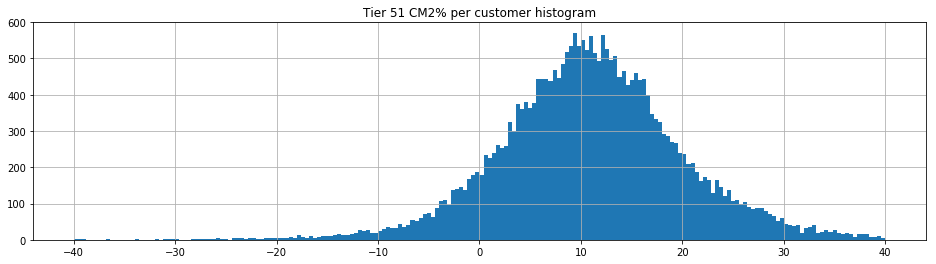

count    26448.000000
mean        11.048043
std          9.792825
min       -393.490209
25%          5.539500
50%         10.898237
75%         16.373074
max         62.251935
dtype: float64

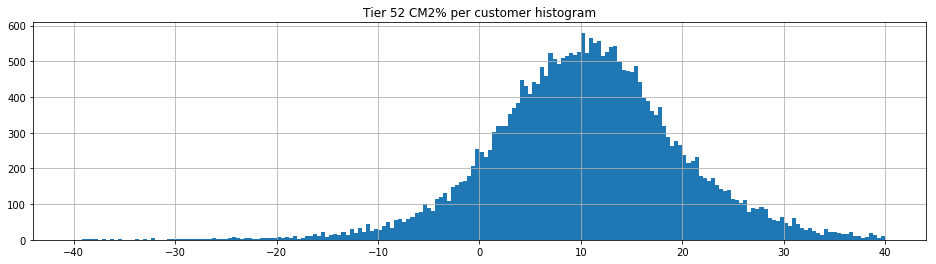

count    28411.000000
mean        10.574570
std          9.776391
min       -332.480713
25%          4.820123
50%         10.553795
75%         16.149900
max         60.968060
dtype: float64

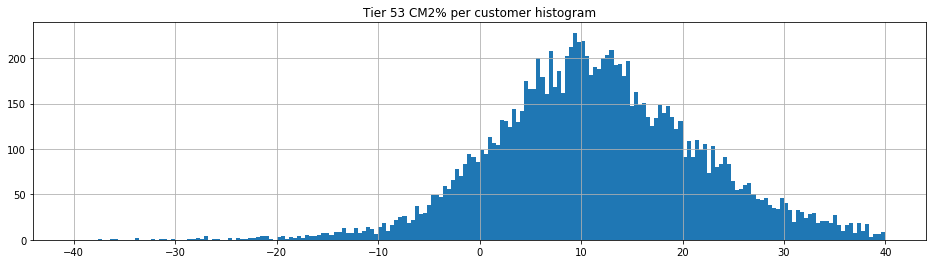

count    11807.000000
mean        11.717771
std         10.569460
min       -111.772314
25%          5.099406
50%         11.211907
75%         18.162175
max         56.515184
dtype: float64

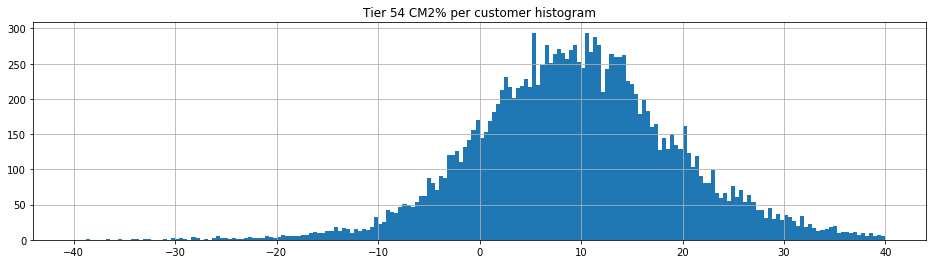

count    15574.000000
mean         9.652757
std         11.507628
min       -560.339058
25%          3.177060
50%          9.470786
75%         15.678272
max         69.783941
dtype: float64

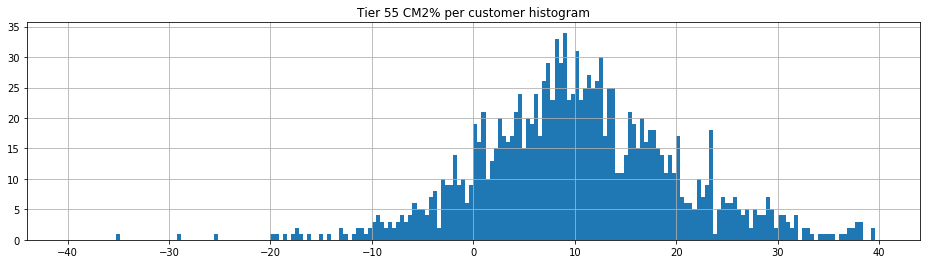

count    1382.000000
mean       10.370119
std        10.138877
min       -59.956771
25%         4.284251
50%         9.960825
75%        16.367026
max        48.625004
dtype: float64

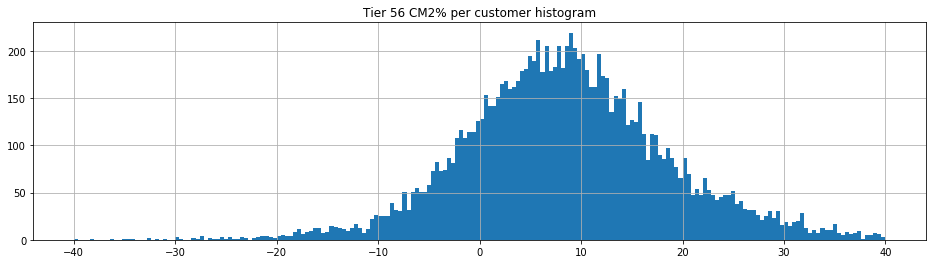

count    11080.000000
mean         8.523964
std         10.505689
min       -157.622501
25%          2.081200
50%          8.193258
75%         14.457942
max         73.543787
dtype: float64

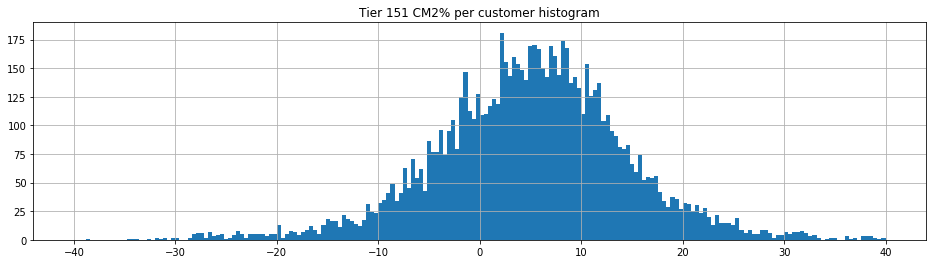

count    8392.000000
mean        5.010699
std         9.850611
min       -70.319669
25%        -0.780304
50%         5.292430
75%        10.843670
max        50.567881
dtype: float64

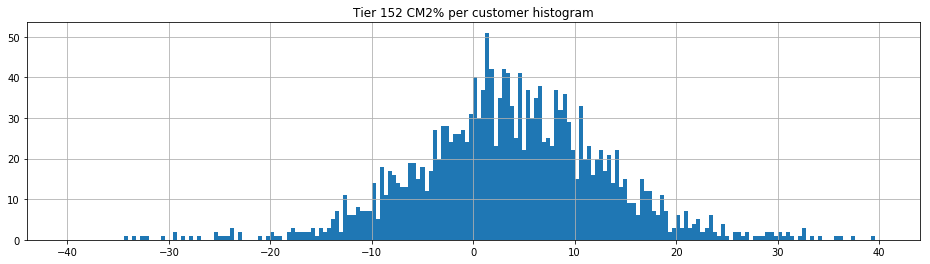

count    1864.000000
mean        3.789565
std         9.885958
min       -58.344857
25%        -2.000581
50%         3.540529
75%         9.513919
max        54.216459
dtype: float64

In [130]:
for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = (data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100).replace(-np.inf, 0)
    plt.figure(figsize=(16,4))
    cm2_per_cust.hist(bins=200, range=(-40, 40))
    title = 'Tier ' + str(tq) + ' CM2% per customer histogram'
    plt.title(title)
    plt.show()
    display(cm2_per_cust.describe())

In [116]:
cm2_thresholds = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
cm2_thres_df = pd.DataFrame(columns=['ZTQ_ID', 'CM2%_threshold', 'eligibles'] )

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    
    for thres in cm2_thresholds:
        cm2_per_cust[cm2_per_cust > thres]
        cust_cm2 = cm2_per_cust[cm2_per_cust > thres].index.values
        row_ = [tq, thres, len(cust_cm2)]
        row_ = pd.DataFrame([row_], columns=cm2_thres_df.columns)
        cm2_thres_df = pd.concat([cm2_thres_df, row_], ignore_index=True)

Total customers in Tier  51 :  26448
Total customers in Tier  52 :  28411


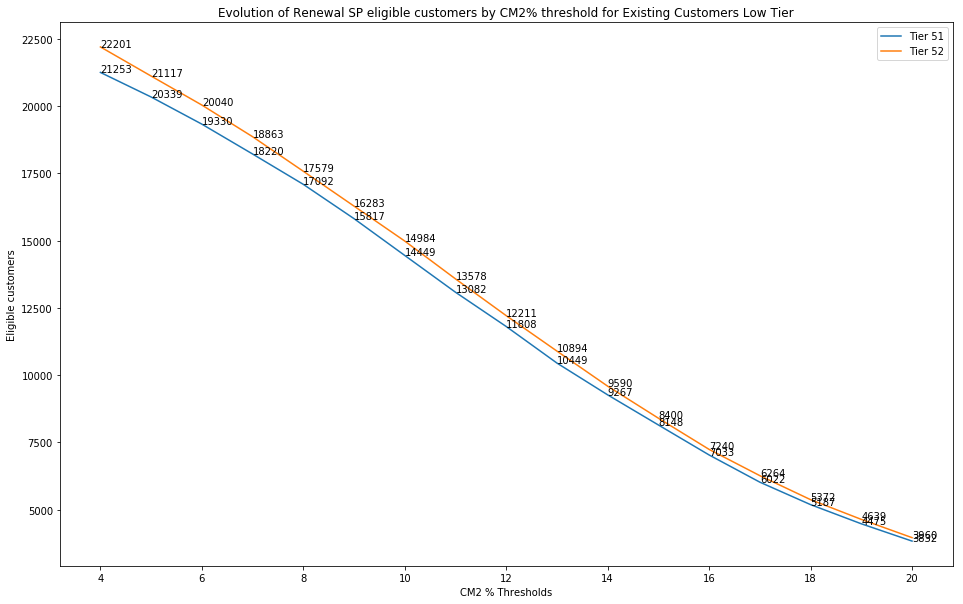

In [117]:
for tq in ztq[:2]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))
    
plt.figure(figsize=(16, 10))

for tq in ztq[:2]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Existing Customers Low Tier')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 51', 'Tier 52'])
plt.show()

Total customers in Tier  53 :  11807
Total customers in Tier  54 :  15574


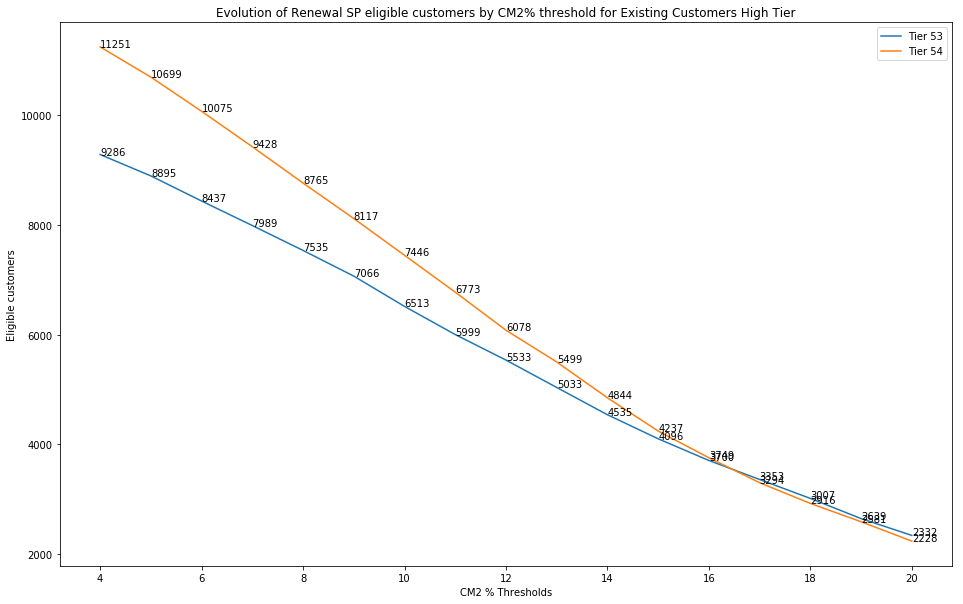

In [118]:
for tq in ztq[2:4]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[2:4]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Existing Customers High Tier')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 53', 'Tier 54'])
plt.show()

Total customers in Tier  55 :  1382
Total customers in Tier  56 :  11080


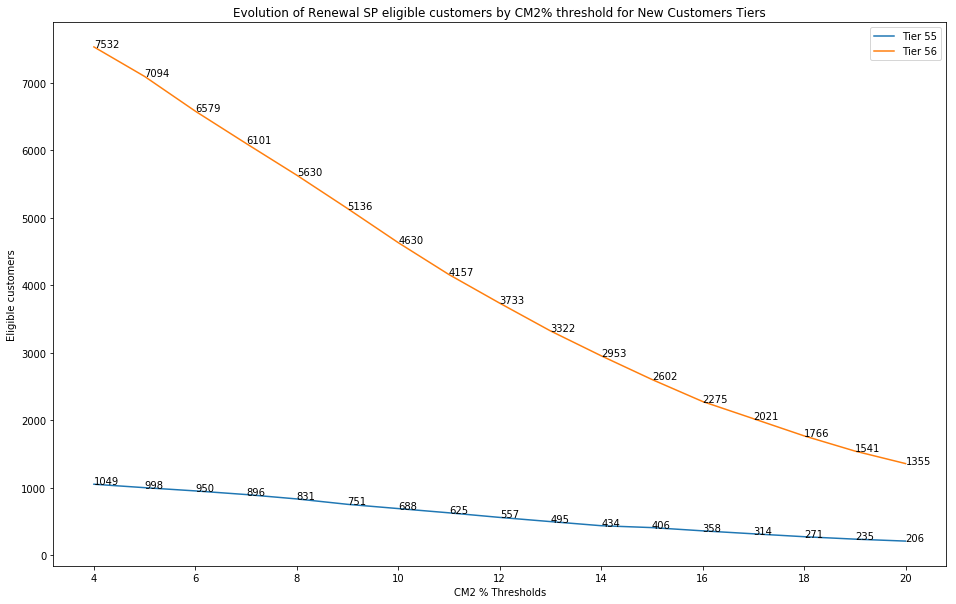

In [119]:
for tq in ztq[4:6]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[4:6]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for New Customers Tiers')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 55', 'Tier 56'])
plt.show()

Total customers in Tier  151 :  8392
Total customers in Tier  152 :  1864


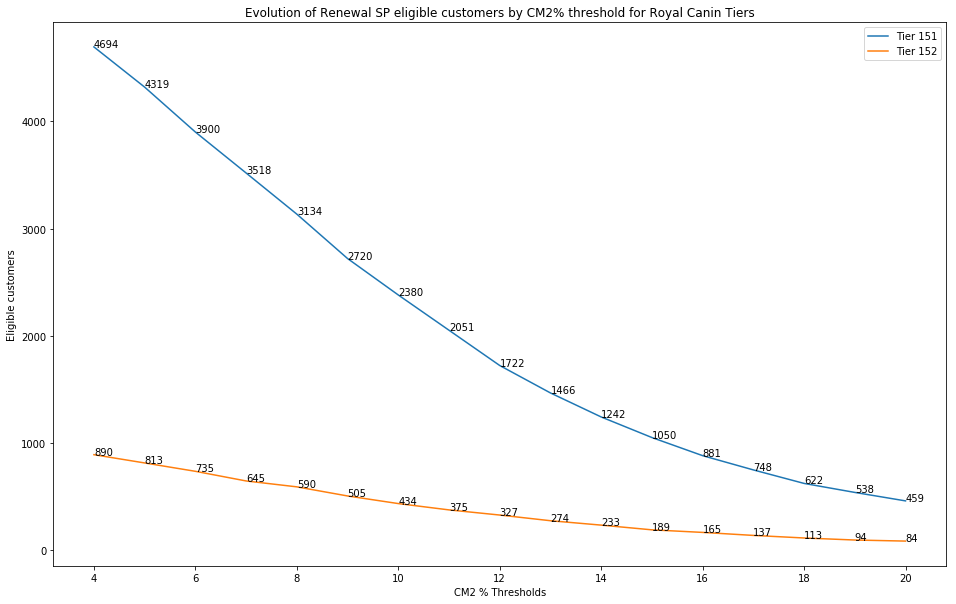

In [120]:
for tq in ztq[6:]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[6:]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Royal Canin Tiers')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 151', 'Tier 152'])
plt.show()

In [121]:
sp_customers = pd.DataFrame(columns=['CUSTOMER_ID', 'TIER', 'ORDERS', 'SALES', 'NET_SALES', 'BASKET_AVG', 'CM1', 'CM1_AVG',
                                    'CM1%', '%_NEG_CM1_ORD', 'LOSS_IN_CM1', 'CM2', 'CM2_AVG',
                                    'CM2%', '%_NEG_CM2_ORD', 'LOSS_IN_CM2'])

for cus in data['CUS_N_KEY_CUSTOMER'].unique():
    cus_data = data[data['CUS_N_KEY_CUSTOMER'] == cus]
    tier = cus_data['CZP_ZTQ_ID'].unique()
    orders = cus_data['SCM_N_ORDER_NR'].nunique()
    sales = cus_data['SCM_SALES_BMF'].sum() - cus_data['SCM_SALES_CANCEL_BMF'].sum() 
    net_sales = cus_data['SCM_D_ORIG_FINANCE_ORDER_NET'].sum()
    basket_avg = sales / orders
    cm1 = cus_data['SCM_D_FINANCE_CM1'].sum()
    cm1_avg = cm1 / orders
    cm1_perc = cm1 / net_sales * 100
    neg_cm1_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)
    perc_neg_cm1_orders = neg_cm1_orders / orders * 100
    total_loss_cm1 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].sum()
    cm2 = cus_data['SCM_D_FINANCE_CM2'].sum()
    cm2_avg = cm2 / orders
    cm2_perc = cm2 / net_sales * 100
    neg_cm2_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].index.values)
    perc_neg_cm2_orders = neg_cm2_orders / orders * 100
    total_loss_cm2 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].sum()
    row_ = [cus, tier, orders, sales, net_sales, basket_avg, cm1, cm1_avg, cm1_perc, perc_neg_cm1_orders, total_loss_cm1,
           cm2, cm2_avg, cm2_perc, perc_neg_cm2_orders, total_loss_cm2]
    row_ = pd.DataFrame([row_], columns=sp_customers.columns)
    sp_customers = pd.concat([sp_customers, row_], ignore_index=True)

In [122]:
sp_customers.round(2)

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
0,5522699,[52],10,515.10,425.70,51.51,134.05,13.41,31.49,0.0,0.00,66.74,6.67,15.68,10.00,-1.41
1,12303445,[51],21,1361.08,1126.79,64.81,369.36,17.59,32.78,0.0,0.00,186.77,8.89,16.58,4.76,-6.16
2,12120478,[51],8,1016.67,843.83,127.08,172.40,21.55,20.43,0.0,0.00,77.91,9.74,9.23,12.50,-3.89
3,6762200,[52],2,63.50,52.48,31.75,12.72,6.36,24.24,0.0,0.00,2.95,1.47,5.62,0.00,0.00
4,17339750,[56],2,179.75,148.55,89.88,31.45,15.73,21.17,0.0,0.00,9.86,4.93,6.64,0.00,0.00
5,3879646,[53],2,40.45,35.13,20.23,17.51,8.76,49.85,0.0,0.00,4.99,2.50,14.21,50.00,-3.46
6,5271749,[52],2,273.44,225.98,136.72,49.04,24.52,21.70,0.0,0.00,28.84,14.42,12.76,0.00,0.00
7,13771836,[51],5,210.68,178.83,42.14,62.26,12.45,34.81,0.0,0.00,20.12,4.02,11.25,0.00,0.00
8,11605060,[51],6,830.69,686.52,138.45,142.39,23.73,20.74,0.0,0.00,53.64,8.94,7.81,16.67,-1.30
9,11911155,"[53, 54]",3,320.06,264.51,106.69,46.17,15.39,17.46,0.0,0.00,14.92,4.97,5.64,33.33,-1.46


In [129]:
#sp_customers.round(2).to_csv('nl_customers_q1.csv', sep=';', index=False, encoding='utf-8')

In [124]:
#art_in_ord = data.groupby(['SCM_N_ORDER_NR'])['SCM_AP_ID'].apply(list)

In [125]:
#art_dict = {key: value for key, value in list(zip(art_in_ord.index.values, art_in_ord.values))}

In [126]:
#art_dict

{101550281: [0, 77101, 67361, 23980],
 101550301: [71052, 0, 68768],
 101550346: [28066, 58168, 58244, 0],
 101550371: [0, 61201, 53627],
 101550376: [78404, 61273, 61268, 61212, 0],
 101550377: [42225, 0, 60311, 60311, 60311],
 101550430: [0, 17543, 17543, 73457],
 101550440: [64625, 77474, 0],
 101550468: [0, 48719, 48731],
 101550475: [26412, 0, 66634, 25246, 18275, 0],
 101550486: [65560, 73457, 73457, 0],
 101550495: [70365, 70363, 70448, 70369, 0],
 101550514: [73732, 71102, 0],
 101550563: [27175, 32209, 72466, 0, 75995, 58169, 73434],
 101550607: [72489, 0, 68753, 68102],
 101550608: [68289, 0],
 101550625: [0, 67235, 67694],
 101550636: [0, 67233, 70773],
 101550677: [56824, 0, 64305, 27938, 27936, 73102, 26663, 42225, 14079, 27936],
 101550708: [73973, 77102, 20886, 42225, 0, 0],
 101550709: [71113, 0],
 101550737: [34033, 49046, 0, 56375],
 101550744: [32463, 61153, 0, 59811],
 101550749: [66014, 43790, 0],
 101550771: [64760,
  0,
  61291,
  75192,
  54607,
  73457,
  33026

In [127]:
#data['PHYS_ARTS'] = [art_dict[i] for i in data['SCM_N_ORDER_NR']]

AP_ID = 0 stands for SP discount, coupons, shipping fee...